In [1]:
import pyforest 
import seaborn as sns
sns.set_style(style='whitegrid')
!pip install imblearn


In [2]:
df=pd.read_csv('framingham.csv')
df.head()

<IPython.core.display.Javascript object>

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
df.shape

(4238, 16)

In [4]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [5]:
df.dropna(inplace=True)
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [6]:
df.diabetes.unique()

array([0, 1])

<AxesSubplot:ylabel='diabetes'>

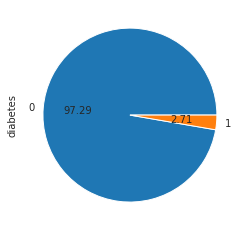

In [7]:
df.diabetes.value_counts().plot.pie(autopct="%.2f")

In [8]:
x=df.drop('diabetes',axis=1)
y=df.diabetes

In [9]:
# the data looks imbalanced we need to balance the data using imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
rus=RandomUnderSampler(sampling_strategy=1)
x_rus,y_rus=rus.fit_resample(x,y)

In [10]:
y_rus.value_counts()

1    99
0    99
Name: diabetes, dtype: int64

In [11]:
over=RandomOverSampler(sampling_strategy=1)
x_over,y_over=over.fit_resample(x,y)
y_over.value_counts()

1    3557
0    3557
Name: diabetes, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

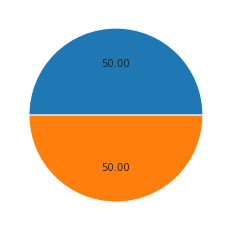

In [12]:
plt.pie(y_over.value_counts(),autopct='%.2f')
plt.show()

In [13]:
y_over.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [14]:
from sklearn.svm import SVC
clf=SVC()
c=np.arange(1,100,10)
gama=np.linspace(0,5,5)
kern=['linear','rbf']
params={
    'C':c,
    'gamma':gama,
    'kernel':kern
}
from sklearn.model_selection import RandomizedSearchCV
cv=RandomizedSearchCV(estimator=SVC(),param_distributions=params,cv=5,return_train_score=False)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
cv.fit(x_rus,y_rus)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]),
                                        'gamma': array([0.  , 1.25, 2.5 , 3.75, 5.  ]),
                                        'kernel': ['linear', 'rbf']})

In [16]:
cv.cv_results_

{'mean_fit_time': array([3.19533348e-03, 1.60730548e+00, 2.70562172e-03, 2.45227814e-03,
        2.47592926e-03, 2.68449783e-03, 2.86259651e-03, 2.63371468e-03,
        5.24268079e+00, 6.35260277e+00]),
 'std_fit_time': array([4.48376813e-04, 7.45620336e-01, 1.15344474e-04, 3.23018374e-05,
        1.70654416e-05, 2.00757255e-04, 1.15977502e-04, 7.60302756e-05,
        3.20769345e+00, 4.42039674e+00]),
 'mean_score_time': array([0.00196166, 0.00170388, 0.00156817, 0.00158105, 0.00151234,
        0.001615  , 0.00164266, 0.00155883, 0.00166793, 0.00168042]),
 'std_score_time': array([2.79196377e-04, 6.25808760e-05, 3.42827678e-05, 3.11161731e-05,
        1.02629714e-05, 6.18072565e-05, 6.74045039e-05, 1.65658197e-05,
        1.90993372e-05, 1.84292472e-05]),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf',
                    'rbf', 'linear', 'linear'],
              mask=[False, False, False, False, False, False, False, False,
                    Fa

In [20]:
df_results=pd.DataFrame(cv.cv_results_,columns=['params','mean_test_score','rank_test_score'])
df_results

<IPython.core.display.Javascript object>

,params,mean_test_score,rank_test_score
0,"{'kernel': 'rbf', 'gamma': 0.0, 'C': 81}",0.494872,6
1,"{'kernel': 'linear', 'gamma': 0.0, 'C': 11}",0.838077,3
2,"{'kernel': 'rbf', 'gamma': 3.75, 'C': 41}",0.504872,5
3,"{'kernel': 'rbf', 'gamma': 0.0, 'C': 31}",0.494872,6
4,"{'kernel': 'rbf', 'gamma': 0.0, 'C': 51}",0.494872,6
5,"{'kernel': 'rbf', 'gamma': 1.25, 'C': 51}",0.634872,4
6,"{'kernel': 'rbf', 'gamma': 5.0, 'C': 11}",0.494872,6
7,"{'kernel': 'rbf', 'gamma': 5.0, 'C': 1}",0.494872,6
8,"{'kernel': 'linear', 'gamma': 2.5, 'C': 91}",0.858590,2
9,"{'kernel': 'linear', 'gamma': 5.0, 'C': 81}",0.863590,1
